## CNN(합성곱 신경망, convolution neural network)
+ 이미지인식, 음성인식 등에 자주 사용되는데, 특히 이미지인식 분야에서 거의 모든 딥러닝 기술에 사용됨  
+ 컨볼루션 신경망 구조 예시  
<br>
<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">  
<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>

### 합성곱 연산
+ 필터 연산
    + 입력 데이터와 필터를 대응하는 값끼리 곱하고, 그 합을 구함
    + 그 결과를 특징맵(feature map)이라 부름
+ filter(=kernel)
    + 필터의 사이즈는 거의 항상 홀수(짝수이면 padding이 비대칭으로 되기 때문)
    + 왼쪽, 오른쪽을 다르게 주어야 함
    + 중심위치가 존재, 즉 구별된 하나의 중심 픽셀이 존재
    + 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정하기 때문에, 과적합을 방지할 수 있음
+ 연산 시각화  
<br>
<img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">  
<sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>

+ 일반적으로 합성곱 연산한 결과 feature map의 크기는 (n-f+1)*(n-f+1)
    + n = 입력 데이터의 크기
    + f = filter의 크기  
<br>
<img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">  
<sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>


#### Padding
+ 입력 데이터의 주변을 특정 값(주로 0)으로 채우는 기법
+ 출력 데이터의 크기는 (n+2p-f+1)*(n+2p-f+1)
+ p = 패딩값(몇칸을 채워넣을지)
+ 'valid' : 패딩을 주지 않음
+ 'same' : 패딩을 주어 입력 이미지의 크기와 feature map 크기를 같게 함


#### Stride 
+ 필터를 적용하는 간격


#### Pooling
+ filter 사이즈 내에서 특정 값을 추출하는 과정
+ MaxPooling 
    + 영역 내 최대값을 선택하는 방법으로, 가장 많이 사용됨
    + 보통 stride=2, kernel_size=2를 통해 feature map의 크기를 절반으로 줄임
    + 모델이 물체의 주요한 특징을 학습할 수 있도록 해줌
    + CNN이 이동불변성 특성을 가지게 해줌(아래 그림에서 같은 색 안의 값이라면 위치가 바뀌더라도 max값은 불변)
    + 모델의 파라미터 개수를 줄여주고, 연산속도를 빠르게 해줌
    
<br>
<img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">  

<sub>출처: https://cs231n.github.io/convolutional-networks</sub>


### Conv1D
+ 텍스트분류나 시계열예측 같은 간단한 문제, 오디오 생성, 기계번역 등의 문제에서 좋은 성능을 보임
+ 타임스텝의 순서에 민감하지 않음
+ 1D Convolution
    + 문맥을 인식
    + Conv1D Layer
        + 입력: `(batch_size, timesteps, channels)`
        + 출력: `(batch_size, timesteps, filters)`
        + 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
        + 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음
    + MaxPooling1D Layer
        + 다운 샘플링 효과(단지 1차원형태로 바뀐 것 뿐)
+ 2D Convolution
    + 지역적 특징을 인식

### GlobalMaxPooling Layer
+ 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어
+ Flatten layer로 대신 사용가능

### IMDB 데이터 사용해보기

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

num_words = 10000   
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((25000,), (25000,), (25000,), (25000,))

In [2]:
max_len = 500
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

padded_x_train.shape, padded_x_test.shape

((25000, 500), (25000, 500))

In [3]:
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Conv1D(filters=32, kernel_size=7, activation='relu'),  
                    MaxPooling1D(7),
                    Conv1D(filters=32, kernel_size=5, activation='relu'),
                    MaxPooling1D(5),
                    GlobalMaxPooling1D(),             #Flatten 효과
                    Dense(1, activation='sigmoid')])  #긍정/부정 이진분류
    
model.compile(optimizer=RMSprop(learning_rate=0.005), loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [4]:
history = model.fit(padded_x_train, y_train, 
                    epochs=50, verbose=0,
                    batch_size=64,
                    validation_split=0.2)

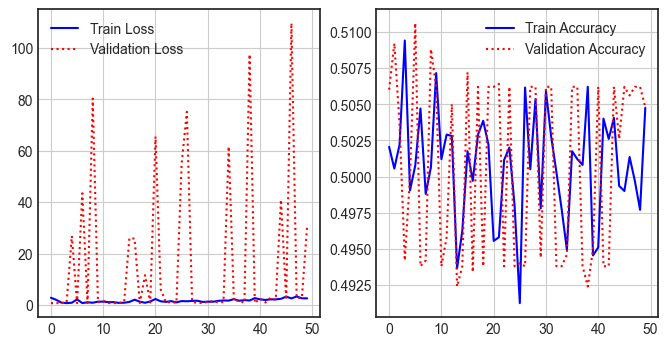

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [6]:
model.evaluate(padded_x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.285638415145874, 0.5]

### 로이터 데이터 사용해보기

In [7]:
from tensorflow.keras.datasets import reuters

num_words = 10000   
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [8]:
max_len = 500
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

padded_x_train.shape, padded_x_test.shape

((8982, 500), (2246, 500))

In [9]:
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Conv1D(filters=32, kernel_size=7, activation='relu'),  
                    MaxPooling1D(7),
                    Conv1D(filters=32, kernel_size=5, activation='relu'),
                    MaxPooling1D(5),
                    GlobalMaxPooling1D(),             #Flatten 효과
                    Dense(46, activation='softmax')])  #다중분류
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)               

In [10]:
history = model.fit(padded_x_train, y_train, 
                    epochs=50, verbose=0,
                    batch_size=64,
                    validation_split=0.2)

InternalError: 2 root error(s) found.
  (0) Internal:  Blas GEMM launch failed : a.shape=(64, 32), b.shape=(32, 46), m=64, n=46, k=32
	 [[node sequential_1/dense_1/MatMul (defined at c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
  (1) Internal:  Blas GEMM launch failed : a.shape=(64, 32), b.shape=(32, 46), m=64, n=46, k=32
	 [[node sequential_1/dense_1/MatMul (defined at c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
	 [[Reshape_19/_36]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_64021]

Function call stack:
distributed_function -> distributed_function


NameError: name 'history' is not defined

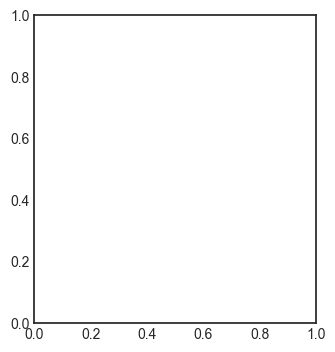

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [ ]:
model.evaluate(padded_x_test, y_test)